In [1]:
#ME17B158 - Omkar Nath

In [2]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [3]:
# Loading Data
x1_1 = np.load('dataset4.npz')['x1']
x1_1 = [x**2 for x in x1_1]
x1_2 = np.load('dataset4.npz')['x2']
y1 = np.load('dataset4.npz')['y']
theta = np.array([[1],[4]])

In [4]:
# Search Function
def search(x1, x2, y, g1, g2, theta):
    J_min = np.mean(np.square(np.dot(x1,theta[0,:])+np.dot(x2,theta[1,:])-y))/2
    for i in g1:
        for j in g2:
            J = np.mean(np.square(np.dot(x1,i)+np.dot(x2,j)-y))/2
            if(J<J_min):
                J_min = J
                theta = np.array([[i],[j]])
    return (J_min, theta)

In [5]:
# Wide Grid Search
g1 = np.linspace(-10,10,100)
g2 = np.linspace(-5,15,100)
J_min, theta_opt = search(x1_1, x1_2, y1, g1, g2, theta)
print("Sub-Minimum Cost: ",J_min)
print("Sub-Optimal Theta: ", *theta_opt)

Sub-Minimum Cost:  0.014039493787287381
Sub-Optimal Theta:  [1.51515152] [3.88888889]


In [6]:
# Narrow Grid Search
g1 = np.linspace(1,2,100)
g2 = np.linspace(3.3,4.3,100)
J_min, theta_opt = search(x1_1, x1_2, y1, g1, g2, theta)
print("Sub-Minimum Cost: ",J_min)
print("Sub-Optimal Theta: ", *theta_opt)

Sub-Minimum Cost:  6.141656984694392e-05
Sub-Optimal Theta:  [1.56565657] [3.79494949]


In [7]:
# Narrower Grid Search
g1 = np.linspace(1.4,1.7,100)
g2 = np.linspace(3.6,4.0,100)
J_min, theta_opt = search(x1_1, x1_2, y1, g1, g2, theta)
print("Minimum Cost: ",J_min)
print("Optimal Theta: ", *theta_opt)

Minimum Cost:  2.5779149694493335e-06
Optimal Theta:  [1.56969697] [3.78181818]


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [8]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

In [9]:
# Importing and Printing
X2_train = np.load('dataset2.npz')['x'].reshape(-1,1)
y2_train = np.load('dataset2.npz')['y']

y2_train = [i for _,i in sorted(zip(X2_train,y2_train))]
X2_train = np.sort(X2_train,axis=0)

print("X",X2_train[:10])
print("y",y2_train[:10])

X [[-8.]
 [-6.]
 [-4.]
 [-2.]
 [ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]]
y [73.17271168043844, 40.18820219659907, 30.271964011519877, 7.038656919715152, 12.58840376315271, 31.625717637993837, 41.39087637700726, 70.65513881652271, 100.5226863618221, 137.30104493491757]


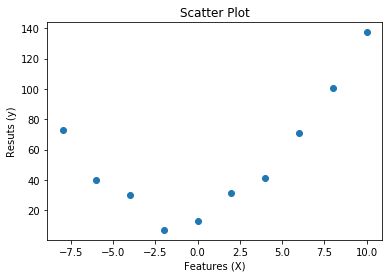

In [10]:
# Scatter Plot the data X and y
plt.scatter(X2_train, y2_train)
plt.title("Scatter Plot")
plt.xlabel("Features (X)")
plt.ylabel("Resuts (y)")
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

In [11]:
# Regressor on train data and Plotter Function
def regressor(X, y, degree = 1, plot = 1):
    transformer = PolynomialFeatures(degree = degree)
    transformer.fit(X)
    X_transformed = transformer.transform(X)

    model = LinearRegression()
    model.fit(X_transformed,y)
    predictions = model.predict(X_transformed)

    if(plot):
        coeff = model.coef_
        intercept = model.intercept_
        a = np.linspace(min(X), max(X), 1000)
        b = [sum([coeff[i]*(x**i) for i in range(0,degree+1)]) + intercept for x in a]

        plt.plot(a, b, color='red')
        #plt.plot(X_transformed[:,1], predictions, color='green')
        plt.scatter(X, y)
        plt.title("Curve of degree "+str(degree))
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()
    
    return (mean_squared_error(y,predictions),predictions)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

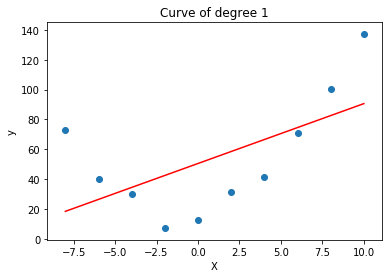

Mean Squared Error:  977.1734445909718


In [12]:
# Linear Regression
MSE, y2_preds = regressor(X2_train,y2_train,1,1)
print("Mean Squared Error: ", MSE)

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

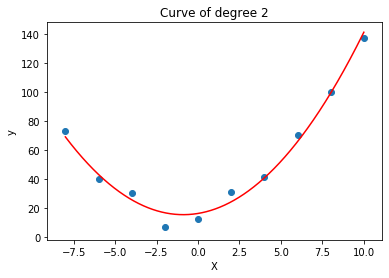

Mean Squared Error:  24.84633172780817


In [13]:
# Quadratic Regression
MSE, y2_preds = regressor(X2_train,y2_train,2,1)
print("Mean Squared Error: ", MSE)

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

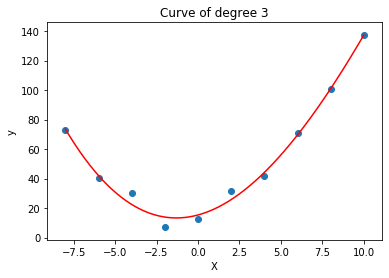

Mean Squared Error:  16.26492228044507


In [14]:
# Cubic Regression
MSE, y2_preds = regressor(X2_train,y2_train,3,1)
print("Mean Squared Error: ", MSE)

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

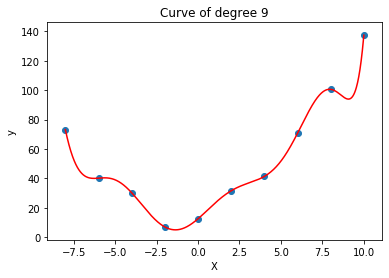

Mean Squared Error:  7.961539288295648e-14


In [15]:
# Degree 9 Regression
MSE, y2_preds = regressor(X2_train,y2_train,9,1)
print("Mean Squared Error: ", MSE)

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

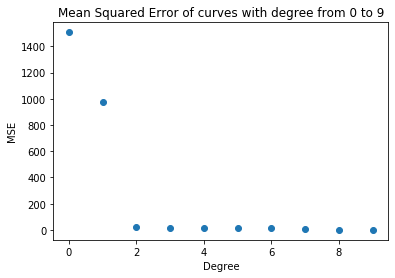

In [16]:
# Training Error Analysis
train2_error = []
for i in range(0,10):
    MSE, y2_preds = regressor(X2_train,y2_train,i,0)
    train2_error.append(MSE)

plt.scatter([i for i in range(0,10)],train2_error)
plt.title("Mean Squared Error of curves with degree from 0 to 9")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

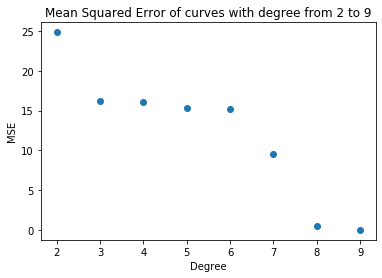

In [17]:
# Plotting for better visibility
plt.scatter([i for i in range(2,10)],train2_error[2:])
plt.title("Mean Squared Error of curves with degree from 2 to 9")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

In [18]:
#Based on the above graphs, degree 9 polynomial has the least error

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

In [19]:
# Regressor and Prediction Error Calculator Function
def regressor_tester(X_train, y_train, X_test, y_test, degree = 1):
    transformer = PolynomialFeatures(degree = degree)
    transformer.fit(X_train)
    X_train_transformed = transformer.transform(X_train)

    model = LinearRegression()
    model.fit(X_train_transformed,y_train)
    train_predictions = model.predict(X_train_transformed)
    
    X_test_transformed = transformer.transform(X_test)
    test_predictions = model.predict(X_test_transformed)
    
    train_error = mean_squared_error(y_train, train_predictions)
    test_error = mean_squared_error(y_test, test_predictions)
    
    return (train_error, test_error)

In [20]:
# Loading Test Data
X2_test = np.load('dataset2_test.npz')['x'].reshape(-1,1)
y2_test = np.load('dataset2_test.npz')['y']

y2_test = [i for _,i in sorted(zip(X2_test,y2_test))]
X2_test = np.sort(X2_test,axis=0)

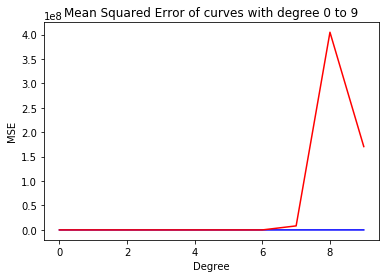

In [21]:
# Train and Test Error
train2_error = []
test2_error = []
for i in range(0,10):
    train, test = regressor_tester(X2_train,y2_train,X2_test,y2_test,i)
    train2_error.append(train)
    test2_error.append(test)

plt.plot([i for i in range(0,10)],train2_error, color = 'blue')
plt.plot([i for i in range(0,10)],test2_error, color='red')
plt.title("Mean Squared Error of curves with degree 0 to 9")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

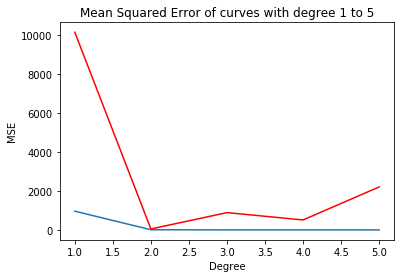

In [22]:
# Plotting for better clarity
plt.plot([i for i in range(1,6)],train2_error[1:6])
plt.plot([i for i in range(1,6)],test2_error[1:6], color='red')
plt.title("Mean Squared Error of curves with degree 1 to 5")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

In [23]:
# Best Degree
print("Least Test Error: ", min(test2_error))
print("Degree with least error: ",test2_error.index(min(test2_error)))

Least Test Error:  63.81395835718886
Degree with least error:  2


In [24]:
#Based on the above graphs, and testing error, polynomial with degree 2 has least error

# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

In [25]:
#For Multiple Linear Regression
from sklearn.model_selection import train_test_split

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [26]:
#Importing Data
main_data = pd.read_csv("dataset3.csv")
num_data = main_data.drop(columns = ['RAD', 'CHAS', 'ZN'])
cat_data = main_data[['RAD', 'CHAS', 'ZN']]

In [27]:
#Mode of Categorical Data
cat_data.mode()

,RAD,CHAS,ZN
0,24.0,0.0,0.0


In [28]:
#Numerical Data Statistics

mean = num_data.mean()
median = num_data.median()
quartile25 = num_data.quantile(0.25)
quartile50 = num_data.quantile(0.50)
quartile75 = num_data.quantile(0.75)
maximum = num_data.max()
minimum = num_data.min()
ranges = num_data.max() - num_data.min()

mean['Parameter']="Mean"
median['Parameter'] = "Median"
quartile25['Parameter'] = "25th Quartile"
quartile50['Parameter'] = "50th Quartile"
quartile75['Parameter'] = "75th Quartile"
maximum['Parameter'] = "Maximum"
minimum['Parameter'] = "Minimum"
ranges['Parameter'] = "Range"

results = pd.DataFrame([mean,median,quartile25,quartile50,quartile75,maximum,minimum,ranges])
results = results.set_index("Parameter")
results

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
Parameter,,,,,,,,,,,
Mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
Median,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
25th Quartile,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50th Quartile,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75th Quartile,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
Maximum,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000
Minimum,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
Range,88.969880,27.280000,0.486000,5.219000,97.100000,10.996900,524.000000,9.400000,396.580000,36.240000,45.000000


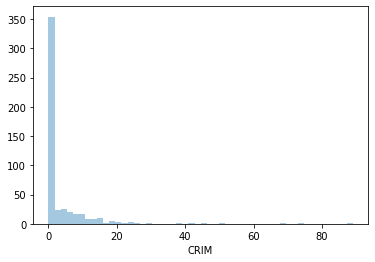

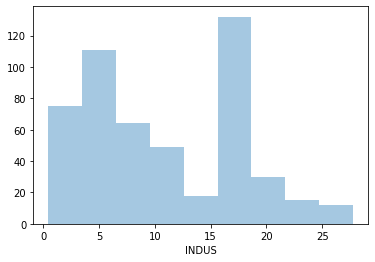

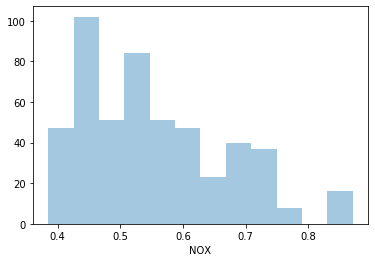

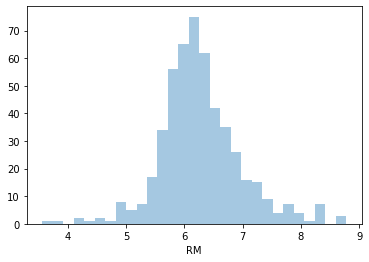

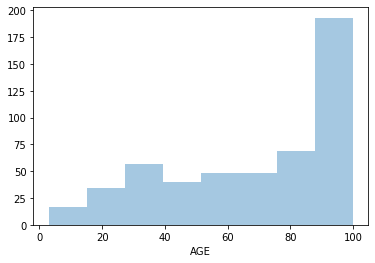

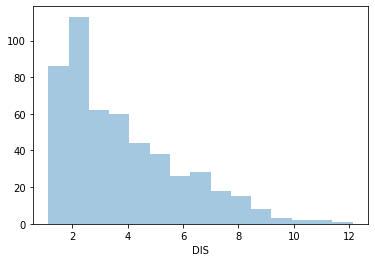

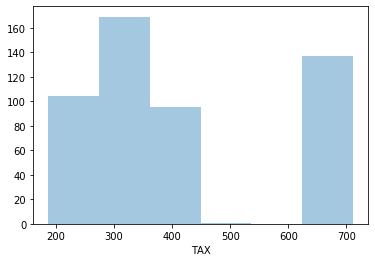

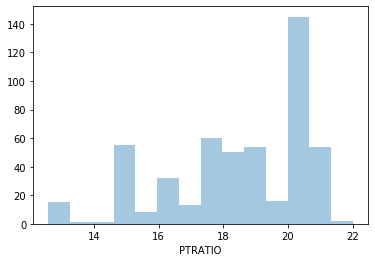

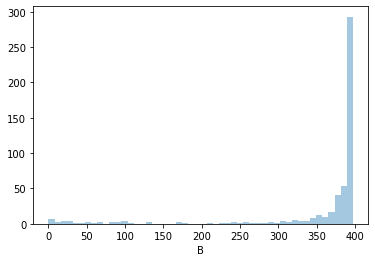

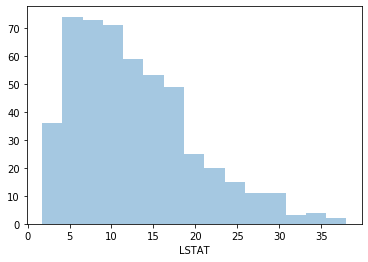

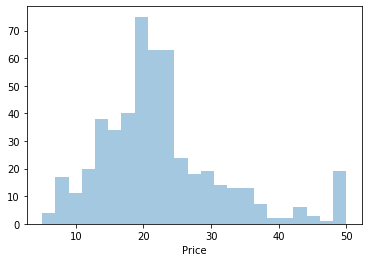

In [29]:
#Histograms of numerical data
for col in num_data.columns:
    sns.distplot(num_data[col],  kde=False, label=col)
    plt.show()

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

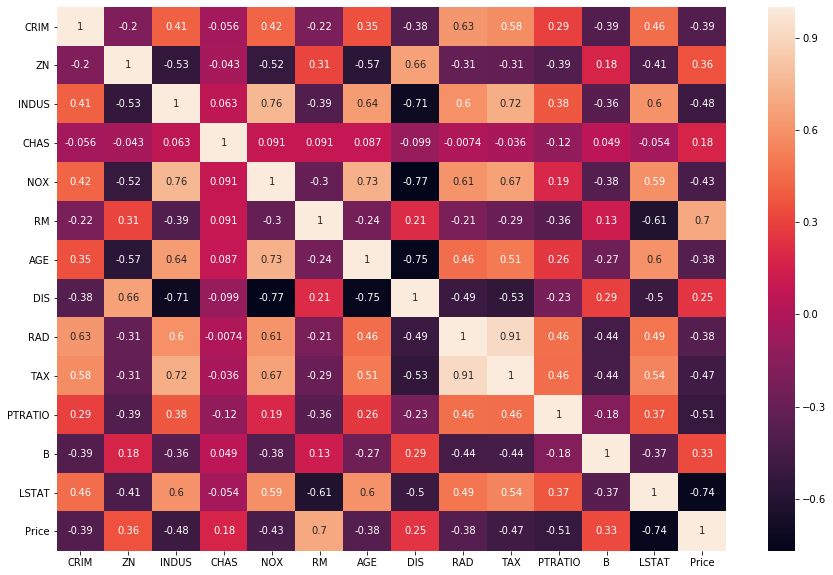

In [30]:
# Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(main_data.corr(), annot = True)

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [31]:
#Finding highly correlated features
price_corr = abs(main_data.corr().Price)
price_corr[price_corr>0.4]

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [32]:
# Main Data
X3 = main_data.drop("Price", axis=1)
y3 = main_data.Price

In [33]:
# Split Data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=2020)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [34]:
# Train MSE
model3 = LinearRegression()
model3.fit(X3_train,y3_train)
train3_predictions = model3.predict(X3_train)

train3_error = mean_squared_error(y3_train, train3_predictions)

print("Train Error: ", train3_error)

Train Error:  22.16642322415018


## 8.6. Predict Outputs for Test Data
Report test MSE

In [35]:
# Test MSE
test3_predictions = model3.predict(X3_test)
test3_error = mean_squared_error(y3_test, test3_predictions)
print("Test Error: ", test3_error)

Test Error:  22.00486155535462


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [36]:
# Coefficients values to determine feature importance
importance = abs(model3.coef_)
cols = X3.columns

cols = [i for _,i in sorted(zip(importance,cols), reverse=True)]
importance = np.sort(importance,axis=0)[::-1]

print("Feature in order of importance:\n",cols)

Feature in order of importance:
 ['NOX', 'RM', 'CHAS', 'DIS', 'PTRATIO', 'LSTAT', 'RAD', 'CRIM', 'ZN', 'INDUS', 'TAX', 'AGE', 'B']


Text(0, 0.5, 'Importance')

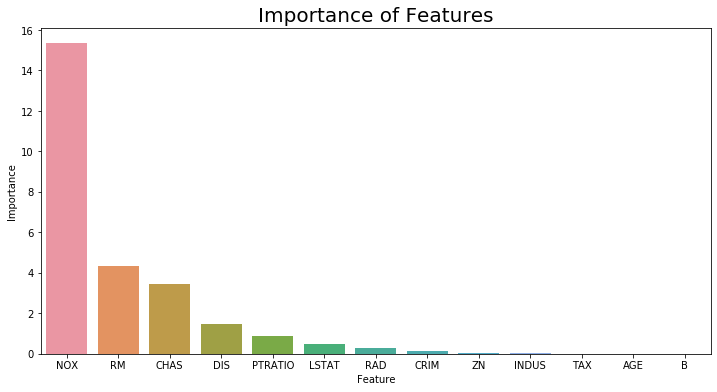

In [37]:
# Plotting feature importance
plt.figure(figsize=(12,6))
ax = sns.barplot(x=cols, y=importance)
plt.title("Importance of Features",fontsize=20)
plt.xlabel("Feature")
plt.ylabel("Importance")

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

Homoscedasticity

Text(0, 0.5, 'Variance')

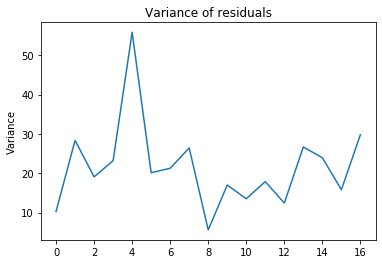

In [38]:
residual = np.array(list(y3_train) + list(y3_test)) - np.array(list(train3_predictions) + list(test3_predictions))

group = 30
variance = []
for i in range(0, residual.shape[0], group):
    var = np.std(residual[i:i+group])**2
    variance.append(var)

plt.plot(variance)
plt.title("Variance of residuals")
plt.ylabel("Variance")

1. Four main Assumptions were made:
   
   a. Linear relationship between features and target - This holds true as we get a comparable low value for both train and test error when using Linear Regression
    
    b. Homoscedasticity: The variance of residual is the same for any value of X - Upon observing the graph above, it is clear that this is not valid.
    
    c. Independence: Observations are independent of each other: Not possible as there are only 13 features, but over 500 training examples.
    
    d. No multi-collinearity among features i.e features are independent: As the corrlation coefficient between all the variables are not 0, no two features are perfectly liearly independent.
    
    
2. As seen from the results, most of the important features are also highly correlated. This also makes sense as the highly correlated features will tend to influence the result more.


3. The train error will generally be smaller than the test error as the model is determined by the best fit to the training data set. The testing data set is completely new, and may or may not aligh with the train data set.


4. Yes the analytical solution will be applicable in this case. X'X is invertible, and it is also not too computationally expensive.